## Classification dengan KKN (K Nearest Neighbours)
* KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dnegan sejumlah tetangga terdekat.
* Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

In [2]:
import pandas as pd

sensus = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk' : ['pria', 'pria', 'pria', 'pria', 'wanita',  'wanita',  'wanita',  'wanita',  'wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


* Dalam kasus ini, akan diprediksi jenis kelamin berdasarkan berat dan tinggi badan.
* tinggi dan berat berperan sebagai features sedangkan jenis kelamin sebagai target.

## Visualisasi Data

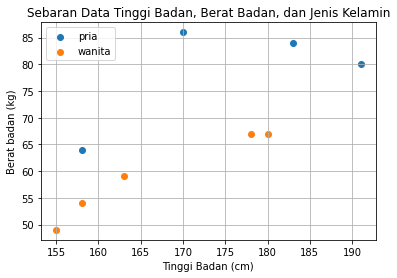

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label = jk)
    
plt.legend(loc = 'upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat badan (kg)')
plt.grid(True)
plt.show()

## Classification dengan KKN

Sebelum proses training model, perlu untuk melakukan
### Preprocessing Data Set

In [13]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']]) # sekumpulan features
y_train = np.array(sensus_df['jk']) # sekumpulan target

print(f'X_train : \n {X_train} \n')
print(f'y_train : {y_train} ')


X_train : 
 [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]] 

y_train : ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita'] 


* mengkonversi y_train dari string menjadi numerik. Karena hanya terdiri dari 2 nilai yaitu pria dan wanita. Kita bisa memanfaatkan LabelBinarizer untuk mengubah string menjadi numerik biner.

In [33]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train : {y_train}')

y_train : [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


* 0 merepresentasikan pria.
* 1 merepresentasikan wanita.
* array dua dimensi dikembalikan ke array satu dimensi.

In [34]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [0 0 0 0 1 1 1 1 1]


### Training KNN Classification Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# jumlah tetangga terdekat untuk melakukan prediksi
K = 3 
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

* setelah model ditraining maka status model tersebut adalah trained model.

### Prediksi Jenis Kelamin

In [30]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1) # agar menjadi 2 dimensi
X_new

array([[155,  70]])

* terbentuk array 2 dimensi yang terdiri dari 1baris dan 2kolom.
* **Ingat** untuk scikit learn sekumpulan features yang digunakan harus dalam bentuk numpy array 2 dimensi, dimana baris jumlah data, kolom jumlah features

In [38]:
y_new = model.predict(X_new)
y_new

array([1])

In [60]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

## Visualisasi Nearest Neighbors

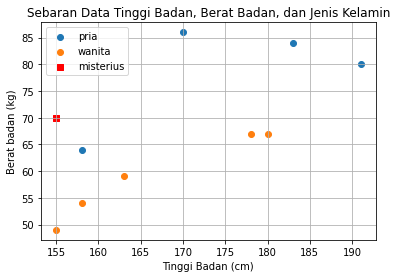

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label = jk)
    
plt.scatter(tinggi_badan, berat_badan,
           marker = 's',
           color = 'red',
           label = 'misterius')
    
plt.legend(loc = 'upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat badan (kg)')
plt.grid(True)
plt.show()

### Kalkulasi Distance (Euclidean Distance)
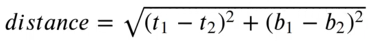

In [43]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [44]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [45]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [46]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


* karena kasus ini kita pilih K = 3 , maka hanya akan diperhatikan 3 jarak terdekat dengan misterius.

## Evaluasi KNN Classification Model
### Testing Set

In [57]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.fit_transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test : \n {X_test} \n')
print(f'y_test : {y_test} ')


X_test : 
 [[168  65]
 [180  96]
 [160  52]
 [169  67]] 

y_test : [0 0 1 1] 


### Prediksi terhadap testing set

In [48]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

### Accuracy
Akurasi adalah proporsi dari instances pada testing set yang diprediksi secara tepat.
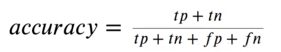
dengan t: true, f: false
n: negatif, p:positif

In [61]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy : {acc}')

Accuracy : 0.75


### Precission
Presisi adalah proporsi dari testing set yang diprediksi positif oleh model yang benar positif
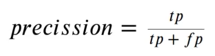

In [62]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


### Recall

Recall adalah proporsi dari testing set yang benar2 positif yang diprediksi positif oleh model
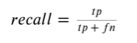

In [63]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall : {rec}')

Recall : 1.0


### F1 Score
yaitu rata-rata harmonik dari presisi dan recall.
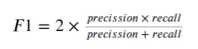

In [64]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1 : {f1}')

F1 : 0.8


## Classification Report
Untuk mengukur performa model

In [65]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report: \n {cls_report}')

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



1 : positif
0 : negatif

* Keempat metriks evaluasi ini ditujukan untuk Binary Classifier dimana berapa pun kelas nya pada target tetap akan diasumsikan sebagai kelompok nilai saja yaitu positif dan negatif.
* Perhitungan diatas hanya memperhatikan kelas 1 saja
* Nilai accuracy tidak memperhatikan kelas
* Sehingga disarankan menggunakan classification report

### Matthews Correlation Coefficient (MCC)
* MCC adalah alternatif dari f1 untuk pengukuran perfoma binary classifier
* Nilai tertinggi MCC adalah 1
* Model Classifier yang acak MCC bernilai 0 sedangkan classier yang benar benar salah MCC bernilai -1
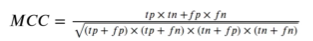

In [66]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: \n {mcc}')

MCC: 
 0.5773502691896258
